Đây là notebook của Chung Thế Thọ dùng để phân tích và trực quan hóa hai câu hỏi sau:
- Nghệ sị nào có nhiều playlist nhất 
- Lược (playback, like,) -> lượt follow

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("../Data Warehouse/Data Warehouse/user.csv")

df # Xem qua dữ liệu

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified,Unnamed: 0
0,https://i1.sndcdn.com/avatars-97PyQxc0CC3EjzWE...,Tokyo,15,JP,2019-05-02T08:00:39Z,40963,17,NaN,630253005,2021-10-29T11:01:14Z,NaN,23,0,https://soundcloud.com/roa_music1031,0,134,Roa,True,NaN
1,https://i1.sndcdn.com/avatars-Z9f2ZHjqZ2RSas7J...,NaN,283,NaN,2016-04-06T15:07:33Z,14000,201,NaN,217441590,2021-05-31T07:59:27Z,NaN,760,10,https://soundcloud.com/freetousemusic,5,61,Free To Use Music,True,NaN
2,https://i1.sndcdn.com/avatars-000387803255-gfw...,NaN,117,NaN,2017-08-06T09:37:27Z,12509,212,NaN,324531068,2019-04-10T18:47:43Z,NaN,727,0,https://soundcloud.com/royaltyfreemusic-nocopy...,9,64,Royalty Free Music - No Copyright Music,False,NaN
3,https://i1.sndcdn.com/avatars-GGWLITcX3rkTeohx...,NaN,231,NaN,2018-10-17T17:18:35Z,122746,16,NaN,525378972,2021-10-14T12:17:12Z,NaN,41,1,https://soundcloud.com/liqwyd,7,97,LiQWYD,True,NaN
4,https://i1.sndcdn.com/avatars-nyqUD36teBzn9yET...,NaN,121,NaN,2011-12-16T18:35:32Z,59057,9,NaN,9855085,2021-08-20T12:15:00Z,NaN,1203,0,https://soundcloud.com/declandp,4,59,Declan DP,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,https://i1.sndcdn.com/avatars-000062965281-pvu...,NaN,5,PL,2013-12-15T21:15:22Z,395,1,NaN,70584473,2019-11-08T22:18:39Z,NaN,1,0,https://soundcloud.com/myapplepl,4,617,MyApple.pl,False,2024.0
12025,https://i1.sndcdn.com/avatars-JO0sSvPsnPeW9Q52...,NaN,44,BR,2012-01-31T19:41:53Z,7908,3,Tecnoblog,11458857,2021-04-29T21:15:54Z,NaN,2,1,https://soundcloud.com/tecnoblog,1,224,Tecnocast,True,2025.0
12026,https://i1.sndcdn.com/avatars-000163838094-anq...,"Petaluma, CA",0,NaN,2015-08-19T02:16:46Z,534,1,Leo,169185192,2019-10-01T00:02:26Z,Laporte,0,0,https://soundcloud.com/the_tech_guy,0,631,The Tech Guy,False,2026.0
12027,https://i1.sndcdn.com/avatars-000164066046-hlt...,"Petaluma, CA",0,US,2015-08-19T19:53:56Z,862,3,NaN,169313522,2019-10-01T00:02:27Z,NaN,0,0,https://soundcloud.com/this-week-in-tech,0,333,This Week in Tech,False,2027.0


# Nghệ sĩ nào có nhiều playlist nhất?
Đầu tiên ta xem tập dữ liệu user sau khi sort lại số lượng playlist từ lớn đến bé. 

In [3]:
# Sort theo số lượng playlist
# rồi xem phần đầu
df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified,Unnamed: 0
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False,NaN
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False,1310.0
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True,1388.0
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False,2006.0
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False,2007.0
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True,1885.0
5881,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295381,103,Armada,28884239,2021-11-01T10:28:35Z,Music,16,0,https://soundcloud.com/armadamusic,1525,2233,Armada Music,True,NaN
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True,86.0
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False,NaN
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True,288.0


Qua đó ta thấy có các dòng dữ bị trùng username, điều này xảy ra do merge 2 dataset khác nhau lại. Hãy xem bao nhiêu dòng bị trùng qua đoạn code dưới

In [4]:
len(df) - len(set(df['username']))

223

Vì vậy để xử lý 223 dòng trùng dữ liệu này, ta sẽ bỏ bớt 1 dòng, độ chênh lệch giữa 2 dòng không quá cao nên ta loại bỏ dòng nào cũng được.

In [5]:
# Loại bỏ các dòng trùng username
df = df.drop_duplicates(subset='username', keep="last")

df.sort_values('playlist_count', ascending=False).head(10)

,avatar_url,city,comments_count,country_code,created_at,followers_count,followings_count,first_name,id,last_modified,last_name,likes_count,playlist_likes_count,permalink_url,playlist_count,track_count,username,verified,Unnamed: 0
5695,https://i1.sndcdn.com/avatars-000333045488-7fj...,CLUB.NL Pheromone Nights & KIWILAN,28534,NL,2010-09-27T12:03:30Z,3258,1995,Arthur,1787682,2021-02-16T17:07:03Z,Detour A 2 D 2,20052,4728,https://soundcloud.com/artoo-detoo,19134,24,Arthur Detour NL Official,False,NaN
11310,https://i1.sndcdn.com/avatars-tygldql6gZe0Nkc8...,Ibiza,28006,ES,2012-12-26T16:26:05Z,11752,1982,NEWS,31287491,2021-11-01T22:16:08Z,PORTAL,21032,4557,https://soundcloud.com/planetibiza,2904,796,PLANET IBIZA,False,1310.0
11388,https://i1.sndcdn.com/avatars-fUQTi010mJY0bz5B...,Helsinki,1354,FI,2017-05-02T18:57:56Z,29038,800,Record,304954708,2021-10-27T16:07:24Z,Label,1550,1868,https://soundcloud.com/ayyofree,1959,516,AY YO TRIP!,True,1388.0
12006,https://i1.sndcdn.com/avatars-000676912385-tyd...,NaN,0,NaN,2013-11-20T18:34:23Z,1382,2,NaN,67274528,2021-11-03T15:58:44Z,NaN,0,0,https://soundcloud.com/the-gary-sharp-show,1649,19332,The Gary Sharp Show,False,2006.0
12007,https://i1.sndcdn.com/avatars-000142060183-ti1...,"Omaha, NE",0,US,2015-04-14T19:36:32Z,1627,4,NaN,148158448,2021-11-03T19:13:47Z,NaN,9,1,https://soundcloud.com/unsportsmanlike-conduct-1,1610,23274,Unsportsmanlike Conduct,False,2007.0
11885,https://i1.sndcdn.com/avatars-VgPABl5zon8SMmuv...,Amsterdam,1,NL,2013-09-17T12:19:17Z,290744,5,A State Of Trance,58502729,2021-10-18T09:41:06Z,NaN,195,1,https://soundcloud.com/astateoftrance,1533,927,A State Of Trance,True,1885.0
10086,https://i1.sndcdn.com/avatars-hNi8wz9wN24NRNAZ...,Amsterdam,87,NL,2012-11-22T20:33:02Z,295322,103,Armada,28884239,2021-10-11T13:15:15Z,Music,16,0,https://soundcloud.com/armadamusic,1523,2232,Armada Music,True,86.0
680,https://i1.sndcdn.com/avatars-77V2bju9gpDRVz8u...,NaN,1,NaN,2018-09-18T14:10:02Z,106,2000,Abele,510722982,2021-03-10T11:18:12Z,Vandrier,1783,1584,https://soundcloud.com/abele-vandrier,1501,0,Abele Vandrier,False,NaN
10288,https://i1.sndcdn.com/avatars-XF8ggizJPkREuPln...,NaN,1803,NaN,2013-10-29T15:58:59Z,73498,1764,RECORD LABEL & LABEL PARTY,64160816,2021-10-22T18:17:48Z,NaN,4487,3327,https://soundcloud.com/gmafiarecords,1389,1468,G-MAFIA RECORDS,True,288.0
11006,https://i1.sndcdn.com/avatars-000082594462-4lh...,New York,0,US,2013-03-21T17:27:01Z,40362,2,The Howard Stern,39782961,2020-11-22T13:29:55Z,Show,5,0,https://soundcloud.com/howardstern,1064,4610,Howard Stern,True,1006.0


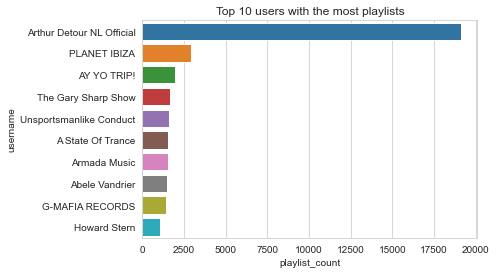

In [8]:
# Sort the dataset by playlist_count in  descending order
# then take the first 10 rows
top10_num_playlist = df.sort_values('playlist_count', ascending=False).head(10)

# Set background style
sns.set_style("whitegrid")

# Create Figure and Axes object
fig, ax = plt.subplots()

# Horizontal bar chart
# bar color represents for that country's region
sns.barplot(x='playlist_count', y='username',
            data=top10_num_playlist,
             dodge=False,)

plt.title('Top 10 users with the most playlists') # Chart title
# plt.ticklabel_format(style='plain', axis='x') # Change format of ticks on y axis

# Show the chart
plt.show()

# Save the image
# bbox_inches = 'tight': prevent the plot being cropped
fig.savefig("top_10_user_most_playlist.png", bbox_inches = 'tight')

### Nhận xét
User có nhiều playlist nhất vượt hẳn các user còn lại (gần như gấp gần 4 lần user thứ 2). Nếu xem vào cột ngày tạo tài khoản thì user này cũng được tạo cũng từ rất sớm từ năm 2010.

In [9]:
top10_num_playlist[['username', 'created_at']]

,username,created_at
5695,Arthur Detour NL Official,2010-09-27T12:03:30Z
11310,PLANET IBIZA,2012-12-26T16:26:05Z
11388,AY YO TRIP!,2017-05-02T18:57:56Z
12006,The Gary Sharp Show,2013-11-20T18:34:23Z
12007,Unsportsmanlike Conduct,2015-04-14T19:36:32Z
11885,A State Of Trance,2013-09-17T12:19:17Z
10086,Armada Music,2012-11-22T20:33:02Z
680,Abele Vandrier,2018-09-18T14:10:02Z
10288,G-MAFIA RECORDS,2013-10-29T15:58:59Z
11006,Howard Stern,2013-03-21T17:27:01Z


Nhưng nếu nhìn vào số bài hát user này có thì lại rất ít, chỉ có 24 bài hát.

In [20]:
top1_num_playlist = top10_num_playlist[top10_num_playlist['username'] == 'Arthur Detour NL Official']
top1_num_playlist[['username', 'playlist_count', 'track_count']]

,username,playlist_count,track_count
5695,Arthur Detour NL Official,19134,24
